In [29]:
%load_ext autoreload
%autoreload 2
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn
import torch
import torch.nn as nn
import torch.optim as optim

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [2]:
df = pd.read_csv("uniqueMMSI.csv")

/usr/lib/python3/dist-packages/IPython/core/interactiveshell.py:3062: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [8]:
df.VesselType.value_counts() > 100

37.0       True
31.0       True
36.0       True
70.0       True
30.0       True
          ...  
1015.0    False
42.0      False
1006.0    False
6.0       False
78.0      False
Name: VesselType, Length: 108, dtype: bool

In [9]:
val_counts = df.VesselType.value_counts()
thresh = val_counts[val_counts >  100]

In [10]:
thresh.index

Float64Index([  37.0,   31.0,   36.0,   70.0,   30.0,   60.0, 1004.0,   90.0,
                80.0, 1019.0, 1025.0, 1024.0, 1001.0, 1012.0,    0.0,   52.0,
              1010.0,   51.0,   79.0,   71.0,   57.0, 1018.0,   89.0,   33.0,
                35.0,   53.0,   50.0,   99.0, 1005.0,   55.0,   34.0, 1020.0,
                40.0,   38.0,   32.0,   82.0,   81.0,   74.0],
             dtype='float64')

In [13]:
df = df[df.VesselType.isin(thresh.index)]
df = df[df.VesselType.notna()]
df.VesselType.value_counts()

37.0      52174
31.0      24305
36.0      21733
70.0      16482
30.0      15499
60.0       8802
1004.0     7640
90.0       7247
80.0       6631
1019.0     4797
1025.0     4048
1024.0     2831
1001.0     2619
1012.0     1833
0.0        1348
52.0       1102
1010.0      814
51.0        722
79.0        564
71.0        507
57.0        446
1018.0      434
89.0        431
33.0        389
35.0        340
53.0        319
50.0        296
99.0        282
1005.0      271
55.0        187
34.0        186
1020.0      179
40.0        131
38.0        129
32.0        128
82.0        116
81.0        109
74.0        105
Name: VesselType, dtype: int64

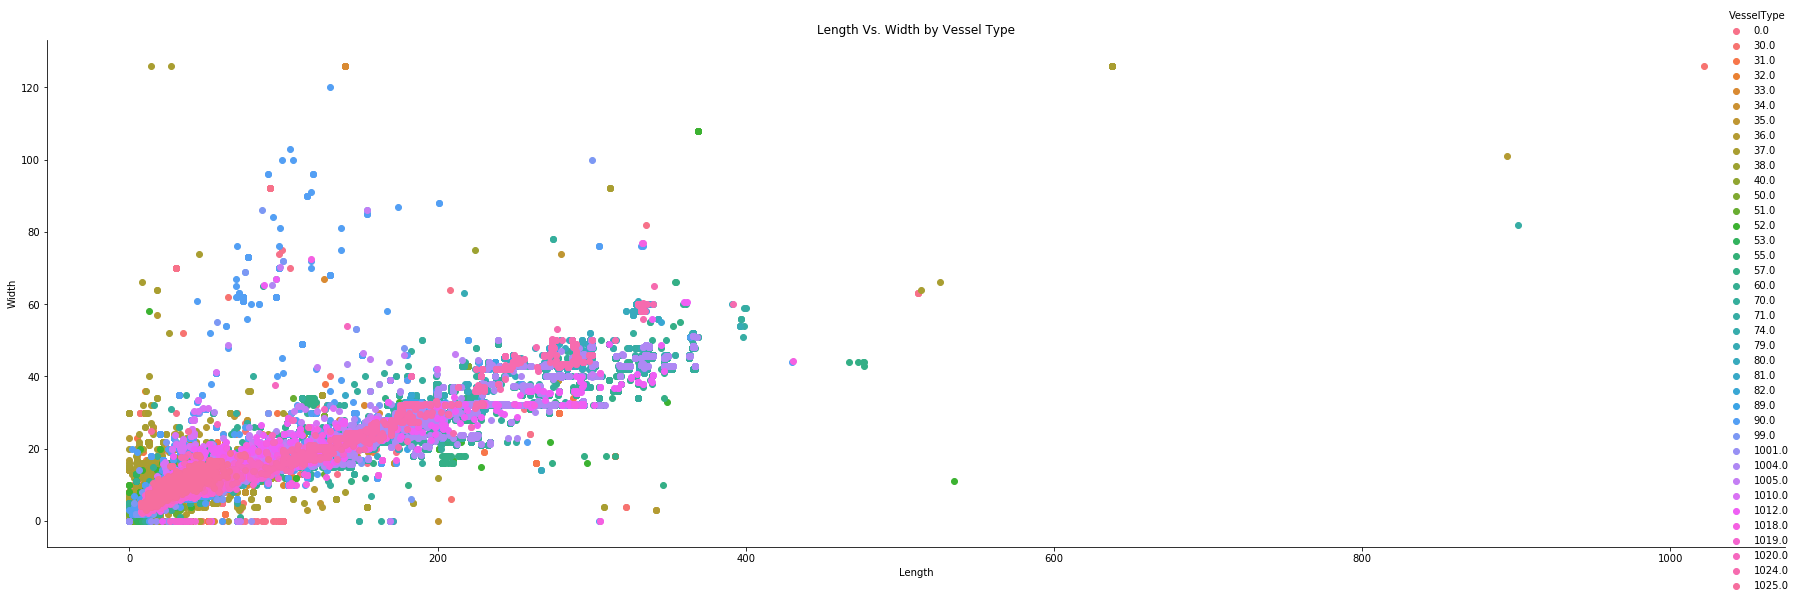

In [25]:
fg = seaborn.FacetGrid(data=df,hue="VesselType",height=8,aspect = 3,legend_out=True)
fg.map(plt.scatter, "Length","Width").add_legend()
plt.title("Length Vs. Width by Vessel Type")
plt.tight_layout()
plt.savefig("scatter.png")

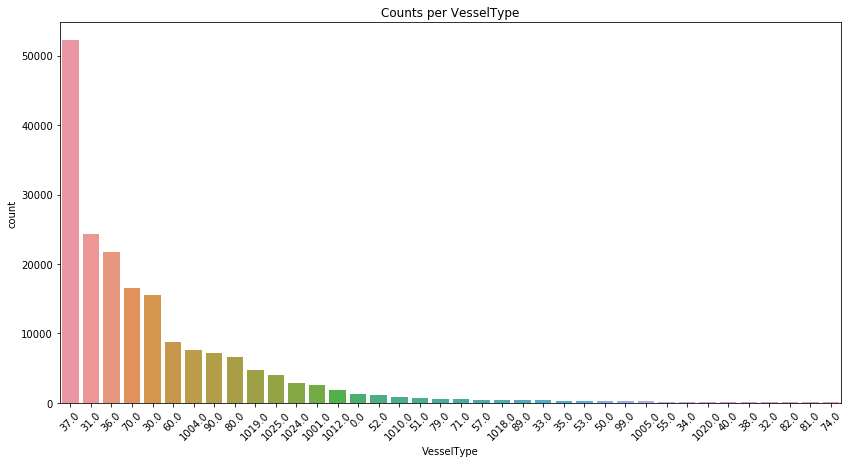

In [51]:
plt.figure(figsize=(14, 7))
plt.xticks(rotation = 45)
ax = seaborn.countplot(x="VesselType",data=df,order=df.VesselType.value_counts().index)
plt.title("Counts per VesselType")
plt.savefig("counts.png")

In [7]:
df.columns

Index(['MMSI', 'VesselType', 'Length', 'Width', 'Draft', 'Cargo',
       'TransceiverClass'],
      dtype='object')

In [8]:
cd /home/matthew/Documents/classes/graduate/physical/project/ECE228Project-/src

/home/matthew/Documents/classes/graduate/physical/project/ECE228Project-/src


In [81]:
from AISDataset import AISDataSetMMSI

In [82]:
le_file = "uniqueMMSI.csv"
file_dir = "/mnt/windows/Users/Public/Documents/ECE278/project/uniqueData/"

In [83]:
dataset = AISDataSetMMSI(le_file, file_dir)

/usr/lib/python3/dist-packages/IPython/core/interactiveshell.py:3254: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  if (await self.run_code(code, result,  async_=asy)):


In [84]:
import numpy as np
split = np.array([0.7,0.3])
data_len = len(dataset)
split_amount = split*data_len
split_amount = np.round(split_amount).astype(np.int)
print(split_amount)
assert np.sum(split_amount) == data_len


[204108  87475]


In [85]:
train_set, test_set = torch.utils.data.random_split(dataset,split_amount.tolist())

In [86]:
import models
import importlib
importlib.reload(models)
from models import TwoLayerReLU

In [87]:
unique_type = df.VesselType.unique()
zero_based = np.arange(len(unique_type))
type_dict = dict(zip(unique_type,zero_based))

In [88]:
print(dataset.df.VesselType.unique())

[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37]


In [89]:
print(df.VesselType.unique())

[  80.   37.   70.   31.   30.   90.   60.   32.   36.   71.   79.   74.
   57.    0.   33.   81.   53.   51.   40.   50.   52.   89.   34.   67.
   54.   55.   99.   38.   35.   82.   84. 1024. 1001. 1025. 1004. 1012.
 1019. 1010.]


In [91]:
model = TwoLayerReLU()
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(model.parameters(),lr=0.==2)

for epoch in range(10):
    train_loader = torch.utils.data.DataLoader(train_set,batch_size=32,shuffle=True)
    running_loss = 0.0
    for i,(inputs,labels) in enumerate(train_loader,0):
        inputs = torch.tensor(inputs).float()
        
        labels = labels.squeeze_()
        labels = labels.type(torch.LongTensor)
        labels = torch.tensor(labels)
        optimizer.zero_grad()
        output = model(inputs)

        loss = criterion(output,labels)
        loss.backward()
        optimizer.step()
        
        running_loss += loss.item()
        batch_size=len(labels)
        
    print("epoch:",epoch,". Loss:",running_loss/batch_size)
    running_loss = 0

<ipython-input-91-4b87855a3f52>:9: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  inputs = torch.tensor(inputs).float()
<ipython-input-91-4b87855a3f52>:13: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  labels = torch.tensor(labels)


epoch: 0 . Loss: 12371.928271611532
epoch: 1 . Loss: 12371.972301880518
epoch: 2 . Loss: 12372.887107213339
epoch: 3 . Loss: 12372.86066865921
epoch: 4 . Loss: 12372.622532606125
epoch: 5 . Loss: 12372.78793088595
epoch: 6 . Loss: 12372.181909243265
epoch: 7 . Loss: 12372.476048866907
epoch: 8 . Loss: 12372.350514968237
epoch: 9 . Loss: 12372.861898144087
